In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/dataset_clear.csv')

In [3]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,delivery_time,late_delivery
0,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05,bc88d3b86fa8443d42894eb7b5f0d73c,5,2018-02-21 00:00:00,2018-02-26 13:53:18,1,credit_card,1,22.77,1,b5466db4cecf95c3c1be0ba32538ce1a,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,informatica_acessorios,37.0,322.0,3.0,100.0,16.0,3.0,13.0,computers_accessories,1 days 01:35:14,False
1,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08,2381e1fb0932d9459573a0553dd8a2b5,3,2017-11-28 00:00:00,2017-11-28 17:14:46,1,credit_card,3,36.01,1,124f74f703e88efe001a10bfa718b6ff,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,unknown,52.0,600.0,1.0,250.0,15.0,8.0,20.0,unknown,10 days 16:48:55,False
2,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,2018-01-26 15:17:57,2018-02-20,8566d94f7bf3bedbb4ca6a29725fc382,5,2018-01-27 00:00:00,2018-01-30 19:18:27,1,debit_card,1,39.10,1,08401f48b67a852d06105725c3013eff,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,brinquedos,58.0,739.0,5.0,350.0,28.0,10.0,12.0,toys,8 days 02:21:25,False
3,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,2018-01-13 14:51:55,2018-02-05,07f4bedc3ab711f4b3400ceaecdd9f9b,5,2018-01-14 00:00:00,2018-01-16 19:29:39,1,credit_card,1,122.47,1,78efe838c04bbc568be034082200ac20,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0,furniture_decor,5 days 03:16:28,False
4,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20,28bbb42c128a4a89860906d48722cede,5,2017-12-09 00:00:00,2017-12-10 18:58:15,1,credit_card,1,40.40,1,6b874ff4c71d18e91079b40396bf176a,b6e1504972665f739dec4facb9943775,2017-12-01 18:01:20,25.30,15.10,automotivo,41.0,1117.0,8.0,300.0,31.0,17.0,27.0,auto,11 days 04:14:57,False


In [55]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], format='mixed', errors='coerce')
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

In [63]:
# Extrai o mês da compra
df['month'] = df['purchase_date'].dt.month 
month = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}
df['month_name'] = df['month'].map(month)


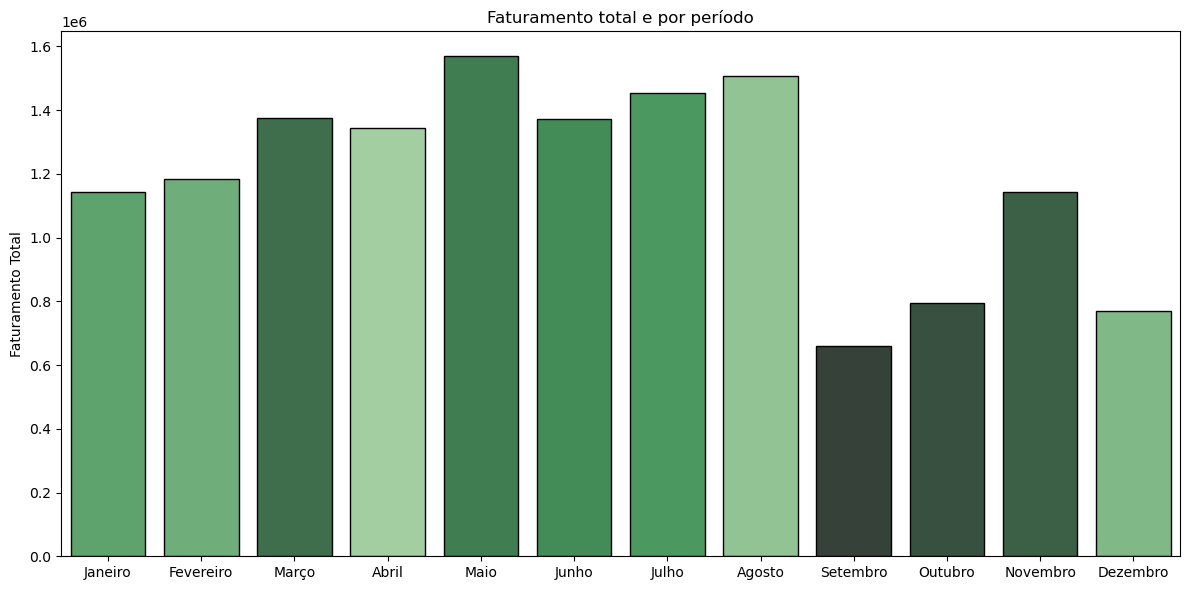

In [5]:
agrupado = df.groupby('month_name', as_index=False)['payment_value'].sum()
plt.figure(figsize=(12, 6))
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Plotando
sns.barplot(data=agrupado, x='month_name', y='payment_value', hue='month_name', 
            palette="Greens_d", edgecolor='black', legend=False, order=ordem_meses)
plt.title('Faturamento total e por período')
plt.xlabel('')
plt.ylabel('Faturamento Total')
plt.tight_layout()
plt.show()

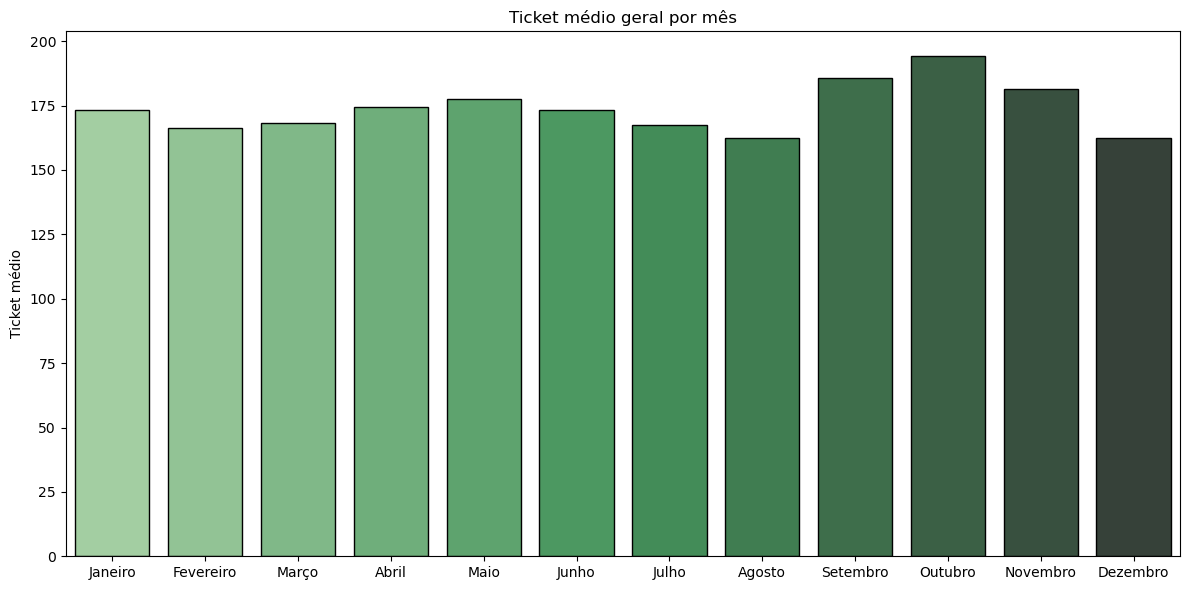

In [45]:
agrupado = df.groupby('month_name').agg({'payment_value': 'sum', 'order_id': 'nunique'})
agrupado['ticket_medio'] = agrupado['payment_value'] / agrupado['order_id']
agrupado = agrupado.reset_index().sort_values(by='month_name', key=lambda x: [ordem_meses.index(m) for m in x])
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='month_name', y='ticket_medio', hue='month_name', 
            palette="Greens_d", edgecolor='black', legend=False, order=ordem_meses)
plt.title('Ticket médio geral por mês')
plt.xlabel('')
plt.ylabel('Ticket médio')
plt.tight_layout()
plt.show()

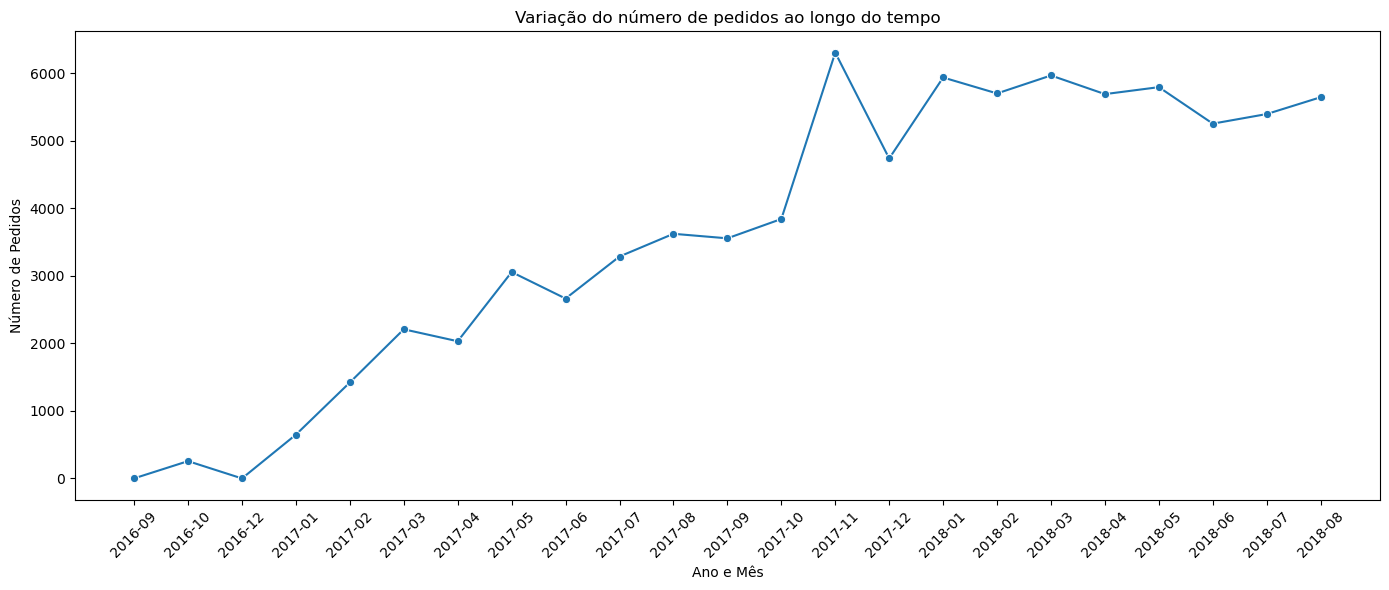

In [62]:
df['ano_mes'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)
pedidos_por_mes = df.groupby('ano_mes')['order_id'].nunique().reset_index()
pedidos_por_mes = pedidos_por_mes.sort_values('ano_mes')

plt.figure(figsize=(14, 6))
sns.lineplot(data=pedidos_por_mes, x='ano_mes', y='order_id', marker='o')
plt.xticks(rotation=45)
plt.title('Variação do número de pedidos ao longo do tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Número de Pedidos')
plt.tight_layout()
plt.show()


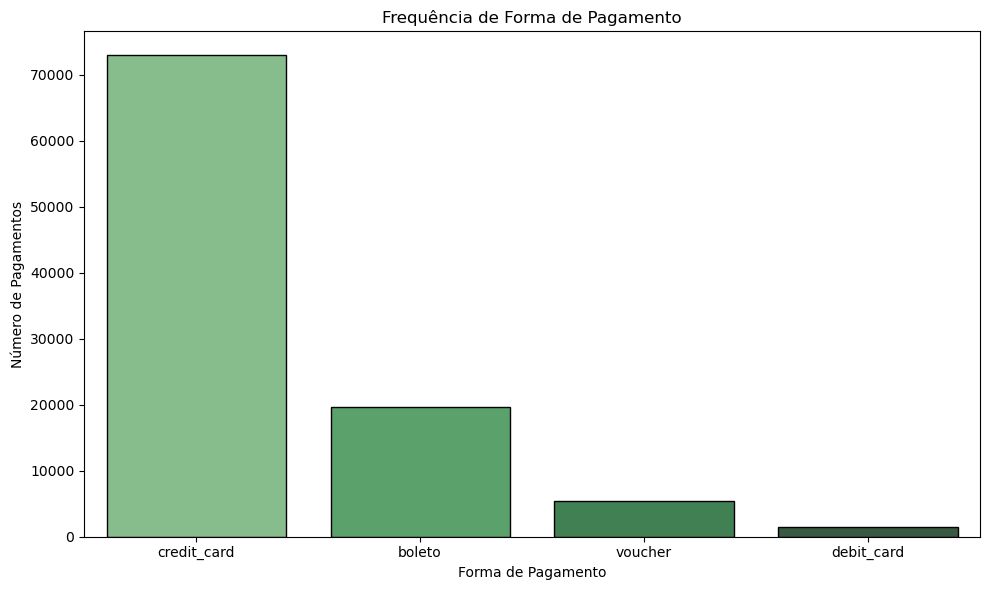

In [7]:
#3. Distribuição de formas de pagamento
#Frequência de payment_type.

#Comparar valor total por tipo de pagamento.

payment_counts = df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']  # renomeando as colunas manualmente

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='payment_type', y='count', hue='payment_type',  palette="Greens_d", edgecolor='black', legend=False)

plt.title("Frequência de Forma de Pagamento")
plt.xlabel("Forma de Pagamento")
plt.ylabel("Número de Pagamentos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

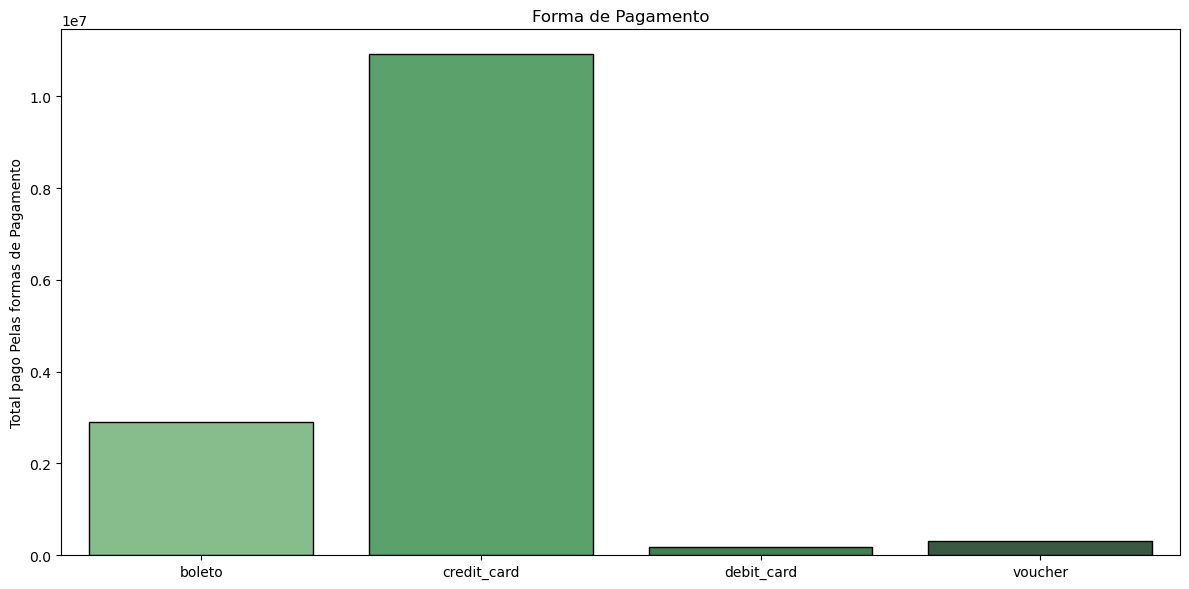

In [8]:
agrupado = df.groupby('payment_type', as_index=False)['payment_value'].sum()
plt.figure(figsize=(12, 6))

sns.barplot(data=agrupado, x='payment_type', y='payment_value', hue='payment_type', 
            palette="Greens_d", edgecolor='black', legend=False)
plt.title('Forma de Pagamento')
plt.xlabel('')
plt.ylabel('Total pago Pelas formas de Pagamento')
plt.tight_layout()
plt.show()

In [9]:
df['payment_installments'].value_counts().sort_index()

payment_installments
0         3
1     51653
2     11764
3      9942
4      6644
5      4927
6      3657
7      1499
8      3881
9       550
10     4582
11       19
12      117
13       14
14       11
15       58
16        5
17        7
18       29
20        8
21        6
22        1
23        1
24       17
Name: count, dtype: int64

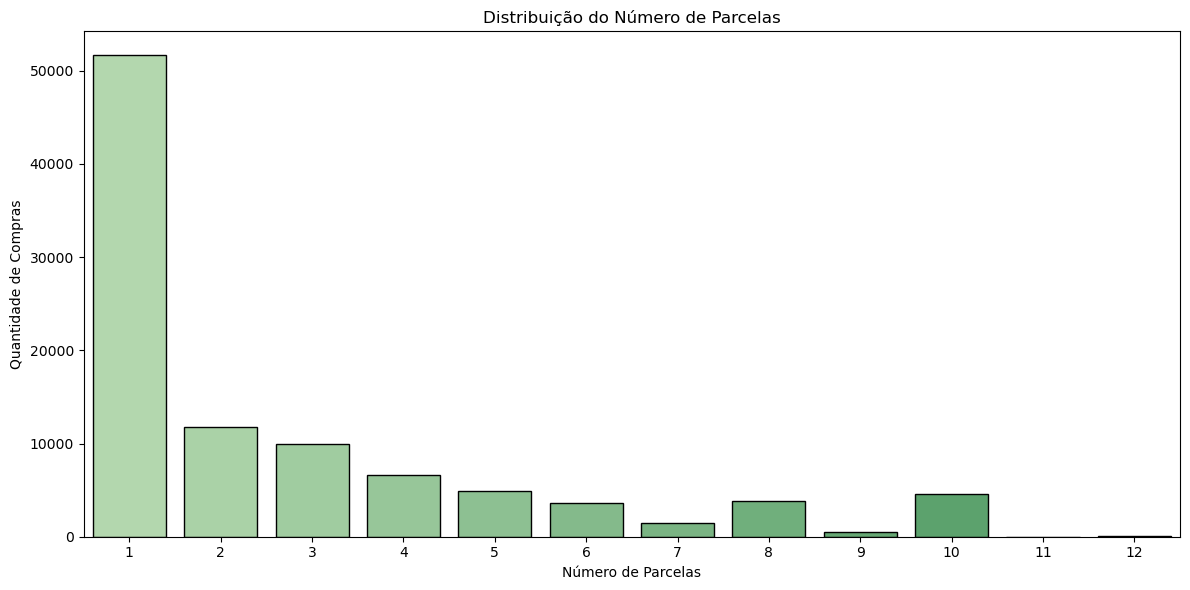

In [10]:
# Parcelamento das compras
#Distribuição de payment_installments.

#Ticket médio por número de parcelas.

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
payment_counts_type = df['payment_installments'].value_counts().reset_index().head(15)
payment_counts_type.columns = ['payment_installments', 'count']
plt.figure(figsize=(12, 6))

sns.barplot(data=payment_counts_type, x='payment_installments', y='count', hue='payment_installments', palette="Greens_d", 
            edgecolor='black', legend=False, order=order)
plt.title('Distribuição do Número de Parcelas')
plt.xlabel('Número de Parcelas')
plt.ylabel('Quantidade de Compras')
plt.tight_layout()
plt.show()

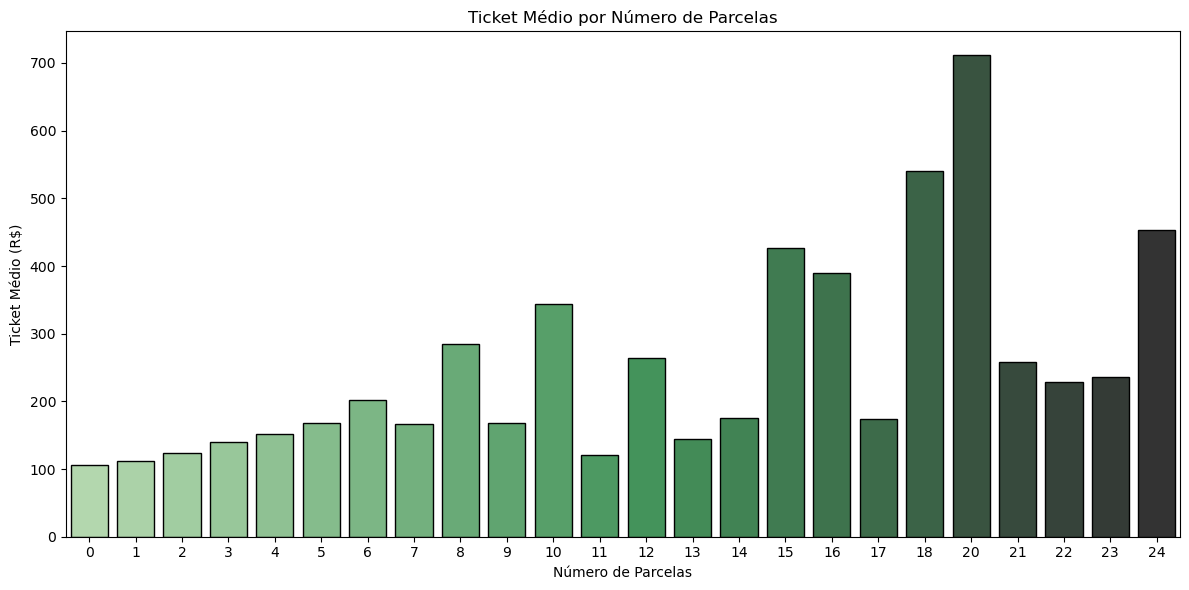

In [11]:
agrupado = df.groupby('payment_installments', as_index=False)['payment_value'].mean()
plt.figure(figsize=(12, 6))
order = sorted(agrupado['payment_installments'].unique())

sns.barplot(data=agrupado, x='payment_installments', y='payment_value', hue='payment_installments', 
            palette="Greens_d", edgecolor='black', legend=False, order=order)
plt.title('Ticket Médio por Número de Parcelas')
plt.xlabel('Número de Parcelas')
plt.ylabel('Ticket Médio (R$)')
plt.tight_layout()
plt.show()

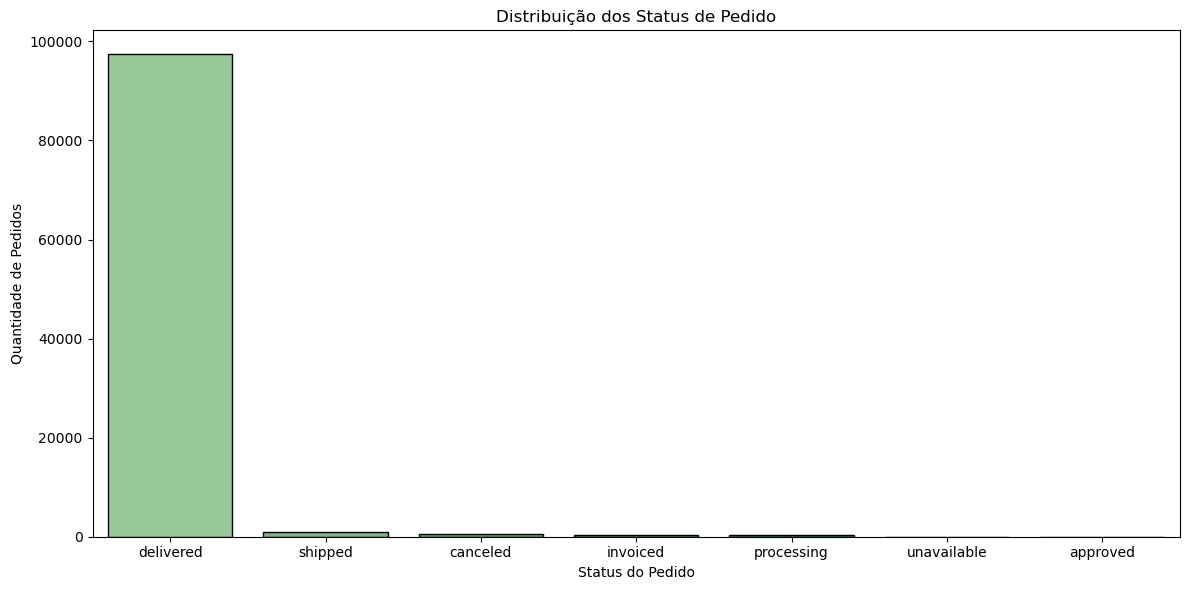

In [16]:
#5. Status dos pedidos
#Proporção de cada order_status (cancelado, entregue, etc).

#Comparar faturamento apenas de pedidos entregues vs todos os pedidos.
status_counts = df['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=status_counts, x='order_status', y='count', hue='order_status', palette="Greens_d", edgecolor='black')
plt.title('Distribuição dos Status de Pedido')
plt.xlabel('Status do Pedido')
plt.ylabel('Quantidade de Pedidos')
plt.tight_layout()
plt.show()

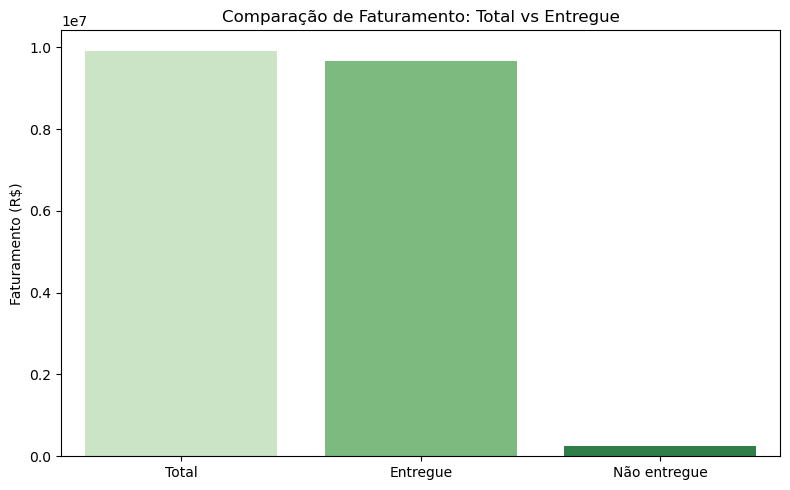

In [21]:
faturamento_total = df['price'].sum()
# Faturamento apenas de pedidos entregues
faturamento_entregue = df[df['order_status'] == 'delivered']['price'].sum()
# Proporção de faturamento entregue
proporcao_entregue = faturamento_entregue / faturamento_total
nao_entregue = faturamento_total - faturamento_entregue

faturamento_df = pd.DataFrame({
    'Tipo': ['Total', 'Entregue', 'Não entregue'],
    'Faturamento': [faturamento_total, faturamento_entregue, nao_entregue]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=faturamento_df, x='Tipo', y='Faturamento', hue='Tipo', palette='Greens')
plt.title('Comparação de Faturamento: Total vs Entregue')
plt.ylabel('Faturamento (R$)')
plt.xlabel('')
plt.tight_layout()
plt.show()

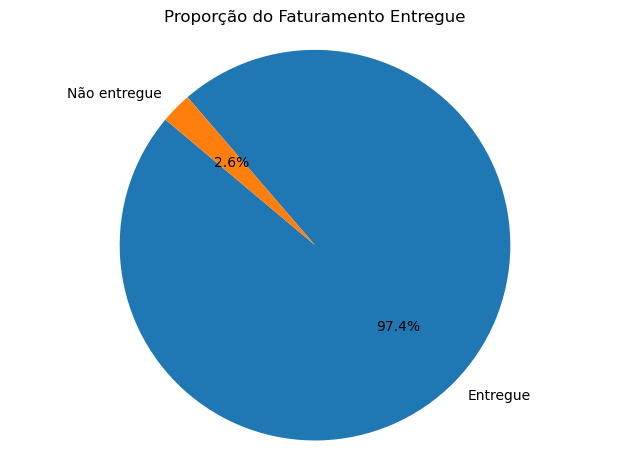

In [27]:
#plt.figure(figsize=(6, 6))
plt.pie([faturamento_entregue, faturamento_total - faturamento_entregue],
        labels=['Entregue', 'Não entregue'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Proporção do Faturamento Entregue')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#6. Produtos mais vendidos e categorias
#Receita gerada por categoria (price ou payment_value por categoria).

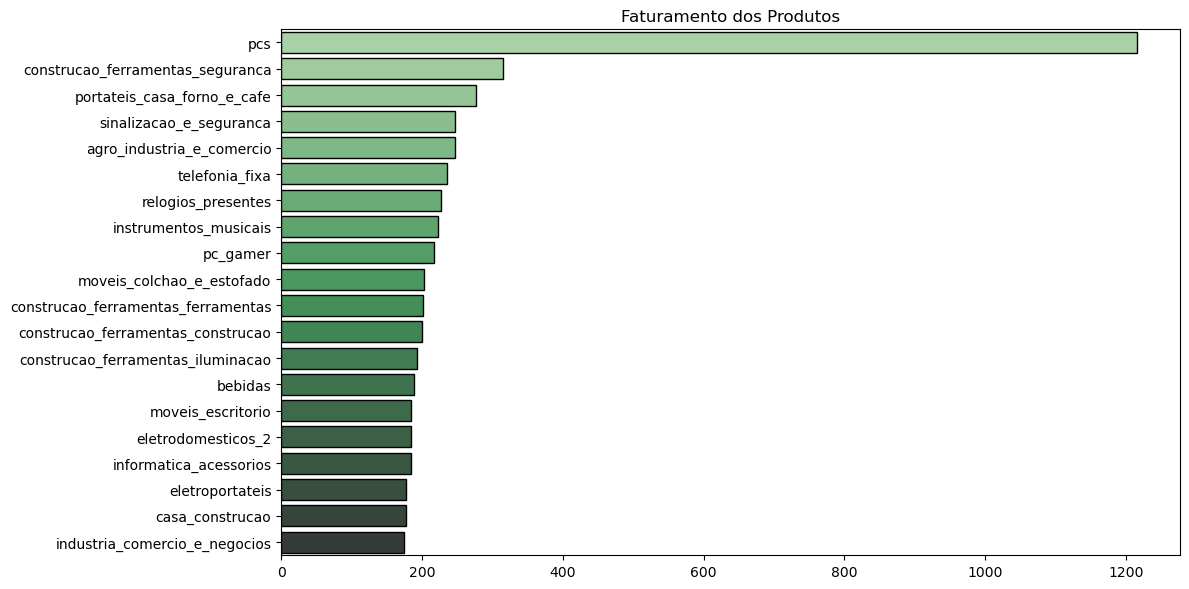

In [28]:
#Média de payment_value por pedido (order_id).
agrupad = df.groupby('product_category_name', as_index=False)['payment_value'].mean()
plt.figure(figsize=(12, 6))
top20 = agrupad.sort_values('payment_value', ascending=False).head(20)

sns.barplot(data=top20, y='product_category_name',   # <<-- Agora as categorias no eixo Y
    x='payment_value',   # <<-- E os valores no eixo X
    hue='product_category_name', palette="Greens_d", edgecolor='black', legend=False)
plt.title('Faturamento dos Produtos')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

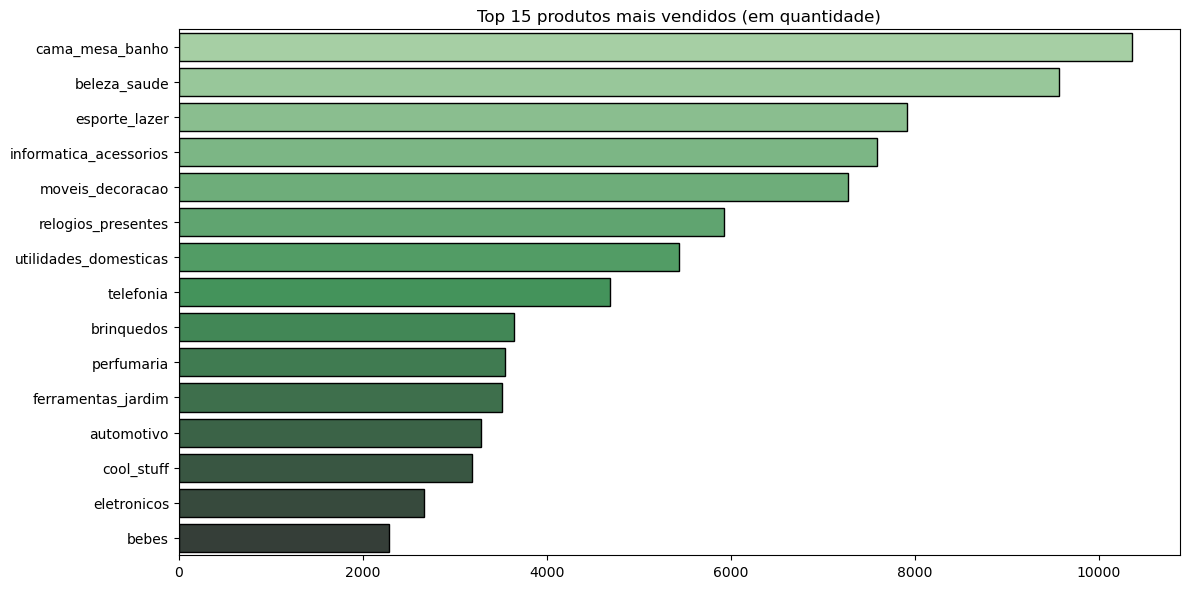

In [49]:
top_vendidos = df['product_category_name'].value_counts().head(15).reset_index()
top_vendidos.columns = ['product_category_name', 'quantidade']
plt.figure(figsize=(12, 6))
sns.barplot(data=top_vendidos, y='product_category_name',   # <<-- Agora as categorias no eixo Y
    x='quantidade',   # <<-- E os valores no eixo X
    hue='product_category_name', palette="Greens_d", edgecolor='black', legend=False)
plt.title('Top 15 produtos mais vendidos (em quantidade)')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
#7. Vendas por região
#Agrupar por customer_state e somar payment_value.

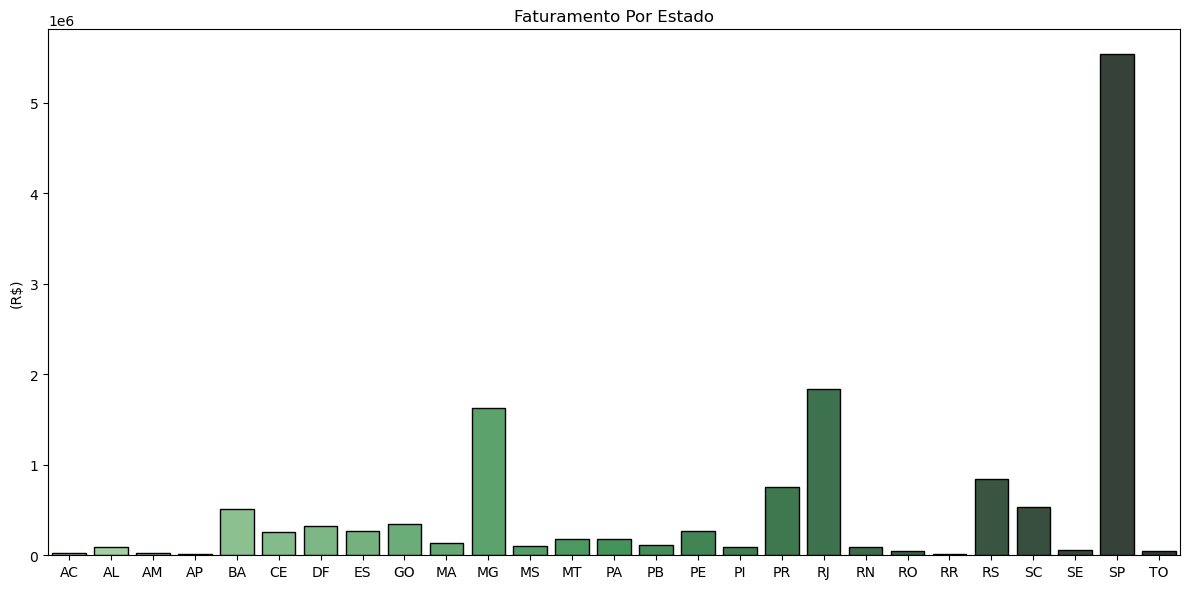

In [32]:
agrupado = df.groupby('customer_state', as_index=False)['payment_value'].sum()
plt.figure(figsize=(12, 6))

sns.barplot(data=agrupado, x='customer_state', y='payment_value', hue='customer_state', 
            palette="Greens_d", edgecolor='black', legend=False)
plt.title('Faturamento Por Estado')
plt.xlabel('')
plt.ylabel('(R$)')
plt.tight_layout()
plt.show()

In [36]:
#Curva ABC
#Analisar quais produtos ou categorias representam 80% do faturamento (Princípio de Pareto).#
# Agrupar faturamento por produto
faturamento_produto = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

# Calcular percentual acumulado
faturamento_produto['percentual'] = 100 * faturamento_produto['price'] / faturamento_produto['price'].sum()
faturamento_produto['percentual_acumulado'] = faturamento_produto['percentual'].cumsum()

# Classificar em A, B ou C
def classificar_abc(valor):
    if valor <= 80:
        return 'A'
    elif valor <= 95:
        return 'B'
    else:
        return 'C'

faturamento_produto['classe_ABC'] = faturamento_produto['percentual_acumulado'].apply(classificar_abc)

# Ver resultado
faturamento_produto.head()

,product_category_name,price,percentual,percentual_acumulado,classe_ABC
0,relogios_presentes,1183256.66,11.929871,11.929871,A
1,beleza_saude,1134584.54,11.439147,23.369018,A
2,cama_mesa_banho,810590.25,8.172561,31.541579,A
3,informatica_acessorios,805267.32,8.118894,39.660473,A
4,esporte_lazer,751574.18,7.577547,47.238020,A


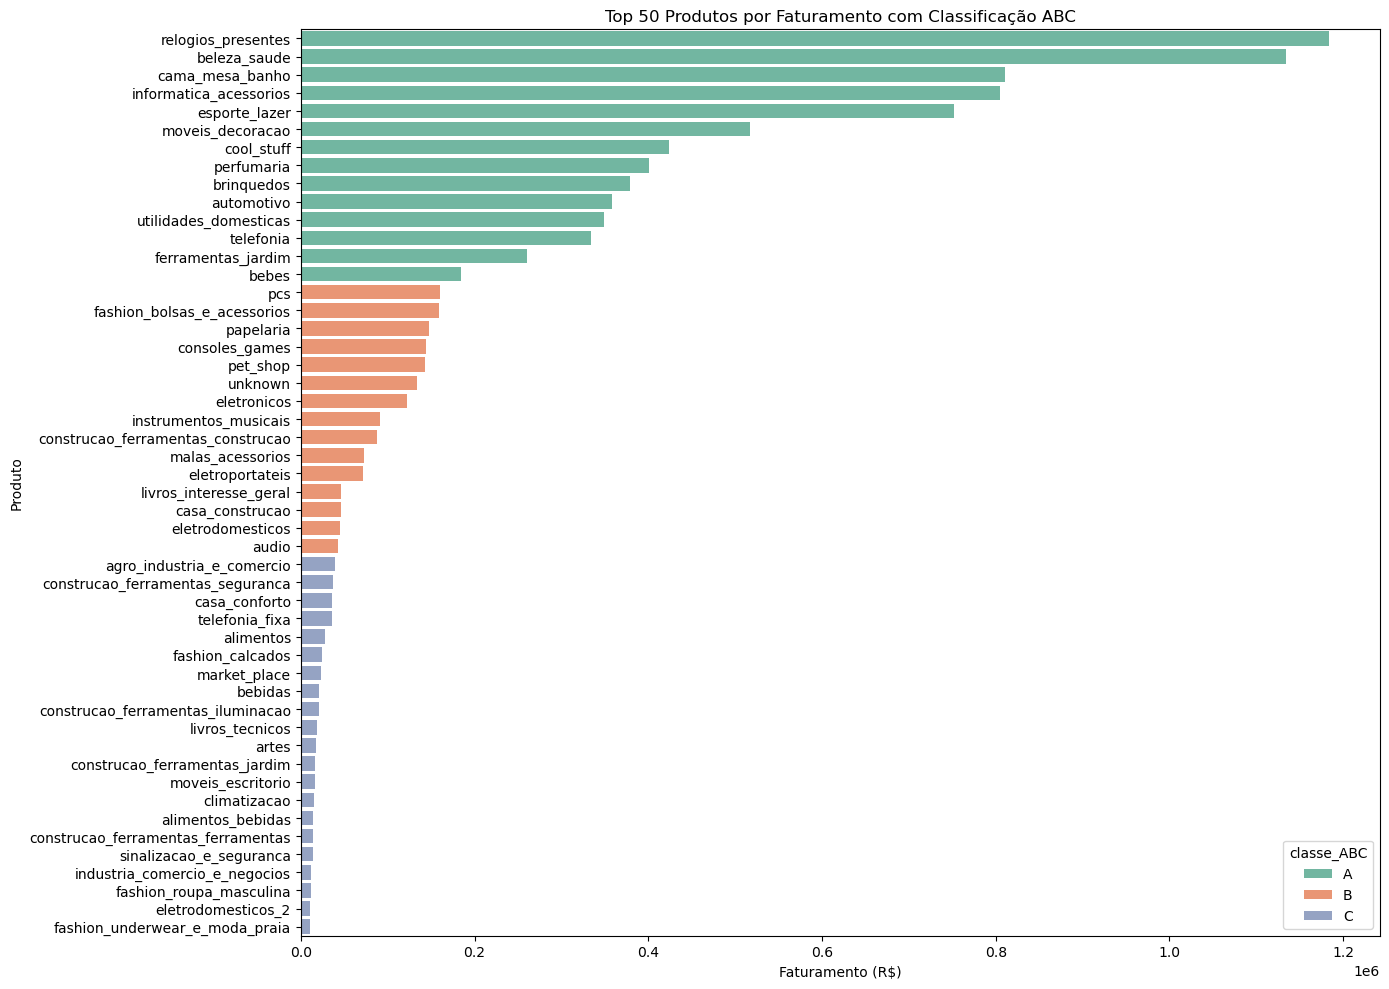

In [41]:
plt.figure(figsize=(14, 10))
sns.barplot(data=faturamento_produto.head(50),  
            y='product_category_name', x='price', hue='classe_ABC', dodge=False, palette='Set2')

plt.title('Top 50 Produtos por Faturamento com Classificação ABC')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()